# 🗂️ Dataset Exploration

In this notebook, you can explore the custom CelebA subset we'll use for training all the models in this class. Feel free to play around with it and change it however you'd like.

**Note:** You should be able to use this notebook with CPU only machines.

If you are using VSCode and you do not see your venv in the kernel options, first activate your venv in your terminal and run 

'''

uv run --active python -m ipykernel install --user --name cmu-10799 --display-name "Python (cmu-10799)"

'''

In VS Code:
- Command Palette → Python: Select Interpreter → pick .venv-(your env)/bin/python
- In the notebook → Select Kernel → pick .venv-(your env) or Python (cmu-10799-cpu)

In [1]:
import sys
sys.path.insert(0, '..')

import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

# Set style
plt.style.use('default')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Load the Dataset

We use a curated CelebA subset from HuggingFace Hub: `electronickale/cmu-10799-celeba64-subset`

The images are already preprocessed to 64x64 resolution.

In [2]:
from src.data import create_dataloader, unnormalize

# Option 1: Load from local directory (if you've already downloaded)
# First download with: python download_dataset.py --output_dir YOUR_PATH
# Then uncomment the following to use this option:
dataloader = create_dataloader(
    root='/home/arnavgoe/10799-Diffusion/cmu-10799-diffusion/data',
    split='train',
    image_size=64,
    batch_size=64,
    num_workers=0,  # Set to 0 for notebooks
    augment=False,  # Disable augmentation for exploration
    from_hub=False,
)

# Option 2: Load directly from HuggingFace Hub (requires 'datasets' package)
# Uncomment the following to use this option:
# dataloader = create_dataloader(
#     split='train',
#     image_size=64,
#     batch_size=64,
#     num_workers=0,
#     augment=False,
#     from_hub=True,
#     repo_name='electronickale/cmu-10799-celeba64-subset',
# )

print(f"Dataset size: {len(dataloader.dataset):,} images")
print(f"Batches: {len(dataloader):,}")

Loaded 63715 images from local directory
Dataset size: 63,715 images
Batches: 995


Now it is upon you to decide how you would like to explore the dataset. I would recommend first visualize a grid of samples, and go from there.

### Visualising a Grid of 16 images

Batch image tensor shape: torch.Size([64, 3, 64, 64])


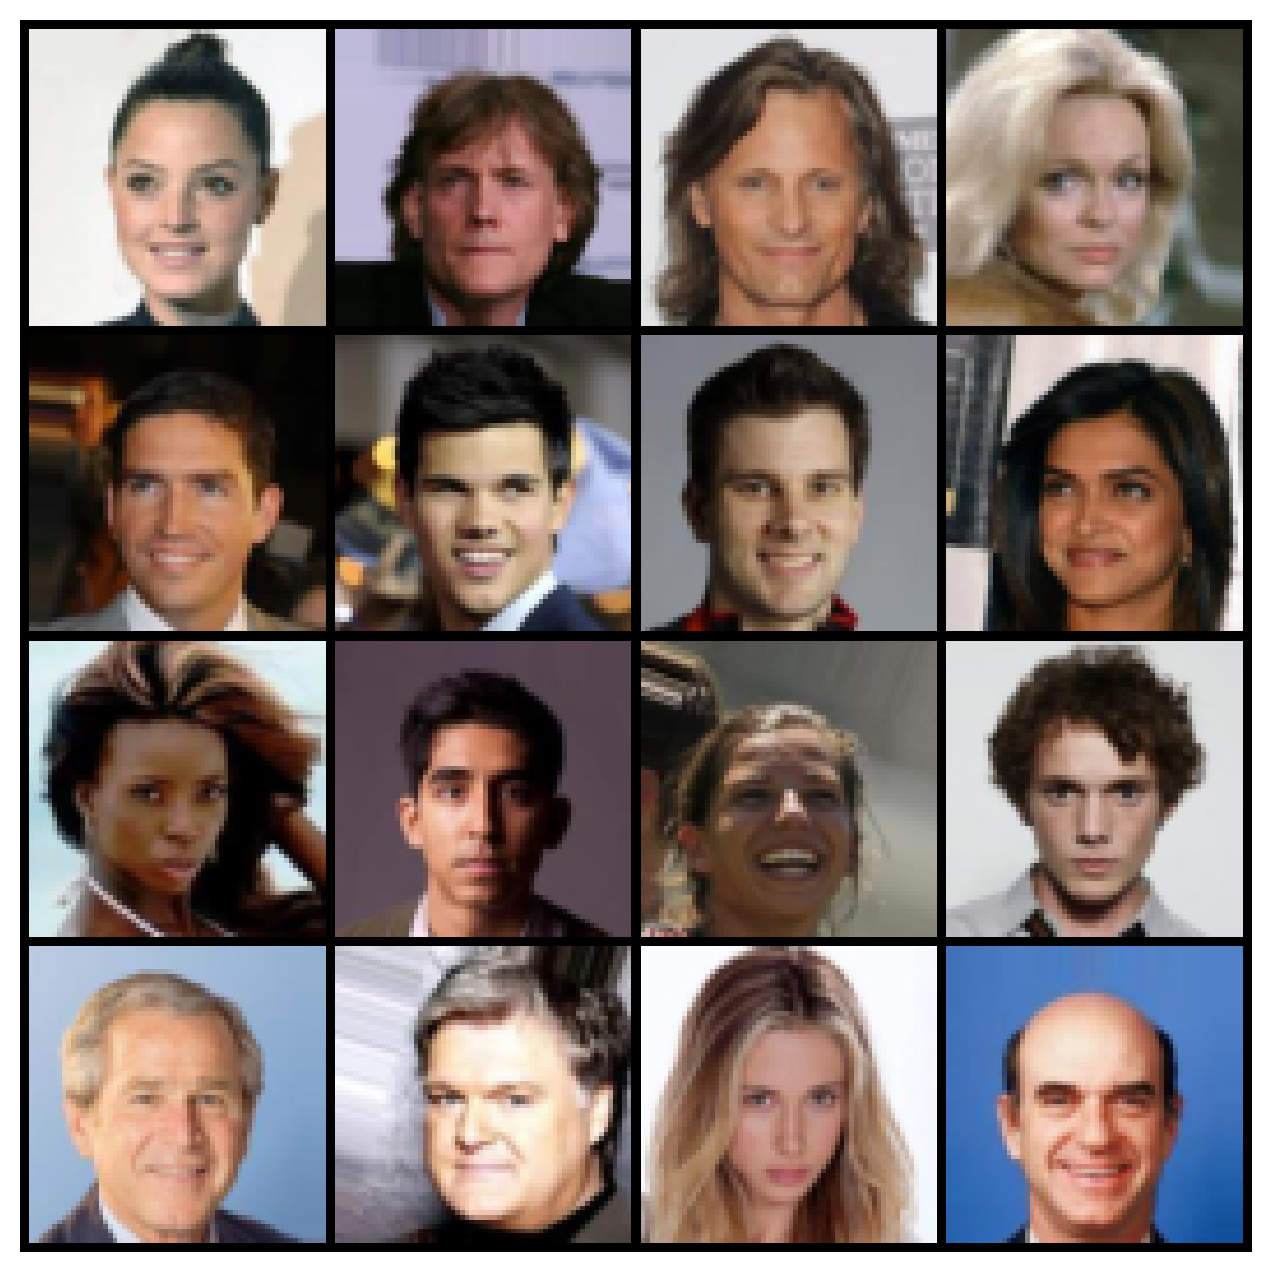

In [3]:
# Visualize a batch of images
images = next(iter(dataloader))
print(f"Batch image tensor shape: {images.shape}")  

# Visualize a grid of 16 images randomly sampled from the batch
num_images_to_show = 16
random_indices = np.random.choice(images.shape[0], num_images_to_show, replace=False)
sampled_images = images[random_indices]
unnormalized_images = unnormalize(sampled_images)
# unnormalized_images = sampled_images

grid_img = make_grid(unnormalized_images, nrow=4)
plt.figure(figsize=(8, 8))
plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.show()

- Exploring the attributes CSV file

In [12]:
import pandas as pd
csv_path = '/home/arnavgoe/10799-Diffusion/cmu-10799-diffusion/data/train/attributes.csv'
df = pd.read_csv(csv_path)
print(f"Loaded attributes for {len(df)} images.")

# Drop the image_id column to focus on attributes
attr_df = df.drop('image_id', axis=1)

print("\n--- Filtering Analysis ---")
constant_attributes = []

# Check each column
for col in attr_df.columns:
    # Get unique values in this column
    unique_vals = attr_df[col].unique()
    
    # If there is only 1 unique value, it was used as a filter
    if len(unique_vals) == 1:
        val = unique_vals[0]
        state = "Present (Always 1)" if val == 1 else "Absent (Always 0)"
        print(f"FILTER DETECTED: '{col}' is {state}")
        constant_attributes.append(col)
        
if not constant_attributes:
    print("No strict binary filters detected (all attributes have mixed 0s and 1s).")
    print("Check if the distribution is heavily skewed instead (e.g., 99% of images).")
    # Optional: Print skew
    # print(attr_df.mean())

Loaded attributes for 63715 images.

--- Filtering Analysis ---
FILTER DETECTED: 'Blurry' is Absent (Always 0)
FILTER DETECTED: 'Eyeglasses' is Absent (Always 0)
FILTER DETECTED: 'Heavy_Makeup' is Absent (Always 0)
FILTER DETECTED: 'No_Beard' is Present (Always 1)
FILTER DETECTED: 'Wearing_Hat' is Absent (Always 0)
